## DTR轨迹数据分析 (Diffusion DTR)

本笔记本对三个DTR任务的轨迹数据进行全面分析：
1. 机械通气 (Vent)
2. 肾脏替代治疗 (RRT)
3. 静脉输液 (IV)

数据文件位置：
- `Input/processed/vent/trajectory_vent.csv`
- `Input/processed/rrt/trajectory_rrt.csv`
- `Input/processed/iv/trajectory_iv.csv`


In [1]:
## 1. 导入必要的库

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# 设置中文字体支持
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Noto Sans CJK SC', 'AR PL UKai CN', 'AR PL UMing CN']  # 使用服务器上可用的中文字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置可视化风格
plt.style.use('ggplot')
sns.set(style="whitegrid", font_scale=1.2)
warnings.filterwarnings('ignore')

# 设置图表大小
plt.rcParams['figure.figsize'] = [12, 8]

print("库导入完成！")

库导入完成！


In [2]:
## 2. 加载数据

# 加载三个任务的轨迹数据
try:
    df_vent = pd.read_csv('Input/processed/vent/trajectory_vent.csv')
    df_rrt = pd.read_csv('Input/processed/rrt/trajectory_rrt.csv')
    df_iv = pd.read_csv('Input/processed/iv/trajectory_iv.csv')
    
    print(f"数据加载成功！")
    print(f"Vent数据形状: {df_vent.shape}")
    print(f"RRT数据形状: {df_rrt.shape}")
    print(f"IV数据形状: {df_iv.shape}")
except Exception as e:
    print(f"数据加载错误: {e}")


数据加载成功！
Vent数据形状: (85869, 31)
RRT数据形状: (2125, 32)
IV数据形状: (1644667, 30)


In [3]:
## 3. 数据基本特征探索

# 3.1 查看数据列名
print("Vent数据列名:")
print(df_vent.columns.tolist())
print("\nRRT数据列名:")
print(df_rrt.columns.tolist())
print("\nIV数据列名:")
print(df_iv.columns.tolist())

# 3.2 查看数据类型
print("\nVent数据类型:")
print(df_vent.dtypes)
print("\nRRT数据类型:")
print(df_rrt.dtypes)
print("\nIV数据类型:")
print(df_iv.dtypes)

# 3.3 检查缺失值
print("\n缺失值统计:")
print("Vent数据缺失值数量:")
print(df_vent.isnull().sum())
print("\nRRT数据缺失值数量:")
print(df_rrt.isnull().sum())
print("\nIV数据缺失值数量:")
print(df_iv.isnull().sum())

# 3.4 查看唯一病人ID数量
print("\n唯一病人ID数量:")
print(f"Vent: {df_vent['subject_id'].nunique()}")
print(f"RRT: {df_rrt['subject_id'].nunique()}")
print(f"IV: {df_iv['subject_id'].nunique()}")

# 3.5 查看数据前几行
print("\nVent数据前5行:")
display(df_vent.head())
print("\nRRT数据前5行:")
display(df_rrt.head())
print("\nIV数据前5行:")
display(df_iv.head())


Vent数据列名:
['subject_id', 'hours_from_onset', 'gcs', 'heart_rate', 'sirs_score', 'sbp', 'dbp', 'mbp', 'temperature', 'spo2', 'urineoutput', 'creatinine', 'calcium', 'chloride', 'bun', 'sodium', 'glucose', 'age', 'gender', 'height', 'weight', 'bmi', 'charlson_comorbidity_index', 'icu_readmit', 'sofa_score', 'peep_bin', 'fio2_bin', 'tidal_volume_ibw_bin', 'reward', 'done', 'sirs_delta']

RRT数据列名:
['subject_id', 'hours_from_onset', 'gcs', 'heart_rate', 'sirs_score', 'sbp', 'dbp', 'mbp', 'temperature', 'spo2', 'urineoutput', 'creatinine', 'calcium', 'chloride', 'bun', 'sodium', 'glucose', 'age', 'gender', 'height', 'weight', 'bmi', 'charlson_comorbidity_index', 'icu_readmit', 'sofa_score', 'rrt_type_bin', 'rrt_dose_bin', 'blood_flow_bin', 'anticoagulation_bin', 'reward', 'done', 'sirs_delta']

IV数据列名:
['subject_id', 'hours_from_onset', 'gcs', 'heart_rate', 'sirs_score', 'sbp', 'dbp', 'mbp', 'temperature', 'spo2', 'urineoutput', 'creatinine', 'calcium', 'chloride', 'bun', 'sodium', 'glucose'

,subject_id,hours_from_onset,gcs,heart_rate,sirs_score,sbp,dbp,mbp,temperature,spo2,...,bmi,charlson_comorbidity_index,icu_readmit,sofa_score,peep_bin,fio2_bin,tidal_volume_ibw_bin,reward,done,sirs_delta
0,10001884,10,15.0,68.8527,0.0,182.0,72.0,100.0,36.72,97.1133,...,26.37,5.0,0.0,2.0,0,2,3,0.0,0,0.0
1,10001884,13,15.0,75.4509,0.0,126.0,70.0,88.0,36.72,97.1083,...,26.37,5.0,0.0,4.0,0,2,3,0.0,0,0.0
2,10001884,17,15.0,73.9624,0.0,145.0,73.0,93.0,36.72,97.0514,...,26.37,5.0,0.0,4.0,0,2,3,0.0,0,0.0
3,10001884,25,15.0,77.3465,0.0,140.0,83.0,100.0,38.33,97.0701,...,26.37,5.0,0.0,4.0,1,2,3,0.0,0,0.0
4,10001884,29,15.0,78.2017,0.0,125.0,79.0,91.0,37.06,96.8429,...,26.37,5.0,0.0,4.0,0,2,3,0.0,0,0.0



RRT数据前5行:


,subject_id,hours_from_onset,gcs,heart_rate,sirs_score,sbp,dbp,mbp,temperature,spo2,...,charlson_comorbidity_index,icu_readmit,sofa_score,rrt_type_bin,rrt_dose_bin,blood_flow_bin,anticoagulation_bin,reward,done,sirs_delta
0,10004235,25,15.0,123.0000,1.0,119.0,75.0,88.0,36.89,96.0000,...,4.0,0.0,18.0,1,4,1,0,1.0,1,0.0
1,10007818,-3,15.0,72.0000,1.0,96.0,50.0,64.0,33.40,100.0000,...,8.0,0.0,16.0,1,1,3,0,0.0,0,0.0
2,10007818,36,15.0,67.0000,1.0,104.0,50.0,65.0,36.50,100.0000,...,8.0,0.0,16.0,1,1,3,0,-1.0,1,0.0
3,10010471,32,14.0,73.4154,0.0,99.0,48.0,59.0,36.83,96.4725,...,9.0,0.0,10.0,2,0,0,0,-1.0,1,0.0
4,10011427,1,15.0,77.0000,0.0,112.0,47.0,68.0,36.44,100.0000,...,8.0,0.0,14.0,1,1,3,0,1.0,1,0.0



IV数据前5行:


,subject_id,hours_from_onset,gcs,heart_rate,sirs_score,sbp,dbp,mbp,temperature,spo2,...,weight,bmi,charlson_comorbidity_index,icu_readmit,sofa_score,iv_fluids_bin,vasopressor_bin,reward,done,sirs_delta
0,10001884,-24,15.0,79.3069,0.0,135.0000,86.0000,90.0000,36.89,96.2594,...,65.0,26.37,5.0,0.0,5.0,0,0,0.0,0,0.0
1,10001884,-23,15.0,75.0000,0.0,119.7846,60.1054,77.8550,36.90,100.0000,...,65.0,26.37,5.0,0.0,5.0,0,0,0.0,0,0.0
2,10001884,-22,15.0,76.0000,1.0,121.2439,59.2873,77.8355,37.10,99.0000,...,65.0,26.37,5.0,0.0,5.0,0,0,0.0,0,1.0
3,10001884,-21,15.0,74.0000,0.0,119.9105,60.0024,77.8333,36.90,100.0000,...,65.0,26.37,5.0,0.0,5.0,0,0,0.0,0,-1.0
4,10001884,-20,15.0,74.0000,0.0,119.9105,60.0024,77.8333,36.70,100.0000,...,65.0,26.37,5.0,0.0,5.0,0,0,0.0,0,0.0


Vent数据描述性统计:


,subject_id,hours_from_onset,gcs,heart_rate,sirs_score,sbp,dbp,mbp,temperature,spo2,...,bmi,charlson_comorbidity_index,icu_readmit,sofa_score,peep_bin,fio2_bin,tidal_volume_ibw_bin,reward,done,sirs_delta
count,8.586900e+04,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000,...,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000,85869.000000
mean,1.498642e+07,17.199420,14.550584,84.663177,0.776357,114.329824,59.720171,76.530824,36.978465,97.441712,...,31.053208,4.942482,0.095226,6.380453,1.716009,3.600601,2.350045,0.076850,0.140831,0.003086
std,2.891022e+06,25.436272,2.043489,17.909571,0.818461,20.760059,12.810641,14.009856,0.825946,2.880316,...,8.423775,2.885408,0.293529,3.530928,1.899697,1.852765,0.613985,0.367323,0.347849,0.678309
min,1.000188e+07,-24.000000,3.000000,1.000000,0.000000,1.360000,3.000000,2.000000,26.670000,19.000000,...,12.860000,0.000000,0.000000,-6.887200,0.000000,0.000000,0.000000,-1.000000,0.000000,-3.000000
25%,1.247839e+07,-4.000000,15.000000,73.000000,0.000000,101.000000,52.000000,68.000000,36.670000,96.117800,...,25.540000,3.000000,0.000000,4.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.505014e+07,12.000000,15.000000,81.000000,1.000000,113.000000,59.000000,75.000000,36.900000,98.000000,...,29.570000,5.000000,0.000000,5.843600,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000
75%,1.744527e+07,37.000000,15.000000,95.000000,1.000000,124.000000,66.000000,83.000000,37.330000,100.000000,...,34.850000,7.000000,0.000000,8.000000,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000
max,1.999984e+07,72.000000,15.000000,215.000000,3.000000,451.961300,249.000000,298.000000,41.300000,102.520500,...,118.030000,19.000000,1.000000,33.259700,6.000000,6.000000,6.000000,1.000000,1.000000,3.000000



RRT数据描述性统计:


,subject_id,hours_from_onset,gcs,heart_rate,sirs_score,sbp,dbp,mbp,temperature,spo2,...,charlson_comorbidity_index,icu_readmit,sofa_score,rrt_type_bin,rrt_dose_bin,blood_flow_bin,anticoagulation_bin,reward,done,sirs_delta
count,2.125000e+03,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,...,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000
mean,1.498130e+07,23.264471,14.528941,85.962660,0.833412,116.241786,58.719963,75.492450,36.760659,96.824768,...,6.326588,0.144000,7.802555,1.610353,0.654588,1.028706,0.038588,0.118118,0.723294,-0.020706
std,2.855587e+06,23.337725,1.694050,18.313969,0.841773,23.030074,14.708241,15.235112,0.740888,3.601928,...,2.946905,0.351172,3.818412,0.774284,1.032537,1.207176,0.192657,0.842423,0.447475,0.450512
min,1.000424e+07,-24.000000,3.000000,41.000000,0.000000,35.316300,14.000000,21.000000,31.600000,53.000000,...,0.000000,0.000000,-4.054400,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-3.000000
25%,1.266876e+07,5.000000,15.000000,73.000000,0.000000,99.922700,49.000000,65.000000,36.440000,96.000000,...,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,1.490144e+07,19.000000,15.000000,82.000000,1.000000,114.000000,57.000000,74.000000,36.780000,97.000000,...,6.000000,0.000000,6.464700,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.737310e+07,41.000000,15.000000,97.000000,1.000000,130.000000,65.000000,83.000000,37.060000,99.000000,...,8.000000,0.000000,10.000000,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000
max,1.998978e+07,72.000000,15.000000,173.000000,3.000000,236.000000,148.000000,173.500000,40.900000,100.000000,...,16.000000,1.000000,21.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,3.000000



IV数据描述性统计:


,subject_id,hours_from_onset,gcs,heart_rate,sirs_score,sbp,dbp,mbp,temperature,spo2,...,weight,bmi,charlson_comorbidity_index,icu_readmit,sofa_score,iv_fluids_bin,vasopressor_bin,reward,done,sirs_delta
count,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,...,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06,1.644667e+06
mean,1.500623e+07,2.002660e+01,1.444605e+01,8.364408e+01,6.268649e-01,1.187074e+02,6.147407e+01,7.760227e+01,3.691532e+01,9.672931e+01,...,1.007227e+02,3.777488e+01,5.345565e+00,1.173812e-01,4.764226e+00,2.681595e-01,9.416374e-02,8.795093e-03,1.713842e-02,5.922171e-04
std,2.889568e+06,2.462503e+01,1.640748e+00,1.652759e+01,7.600149e-01,2.129131e+01,1.407008e+01,1.458546e+01,6.309602e-01,2.737842e+00,...,2.820039e+03,9.757103e+02,2.926653e+00,3.218741e-01,2.949072e+00,6.352974e-01,3.035492e-01,1.306181e-01,1.297872e-01,6.933887e-01
min,1.000188e+07,-2.400000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e-03,-1.844000e+00,4.300000e-01,2.080000e+01,1.000000e+00,...,1.000000e+00,9.700000e+00,0.000000e+00,0.000000e+00,-1.407270e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-3.000000e+00
25%,1.251354e+07,0.000000e+00,1.500000e+01,7.300000e+01,0.000000e+00,1.040000e+02,5.200000e+01,6.800000e+01,3.661000e+01,9.600000e+01,...,6.960000e+01,2.703000e+01,3.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.501342e+07,1.600000e+01,1.500000e+01,8.000000e+01,0.000000e+00,1.170000e+02,6.000000e+01,7.672800e+01,3.689000e+01,9.700000e+01,...,8.263330e+01,3.377000e+01,5.000000e+00,0.000000e+00,4.392500e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.751978e+07,3.900000e+01,1.500000e+01,9.300000e+01,1.000000e+00,1.300000e+02,6.800000e+01,8.500000e+01,3.717000e+01,9.800000e+01,...,9.850000e+01,3.777490e+01,7.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.999999e+07,7.200000e+01,1.500000e+01,2.800000e+02,3.000000e+00,4.543069e+02,2.940000e+02,2.990000e+02,4.230000e+01,1.131195e+02,...,5.515581e+05,1.908505e+05,1.900000e+01,1.000000e+00,4.220940e+01,4.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


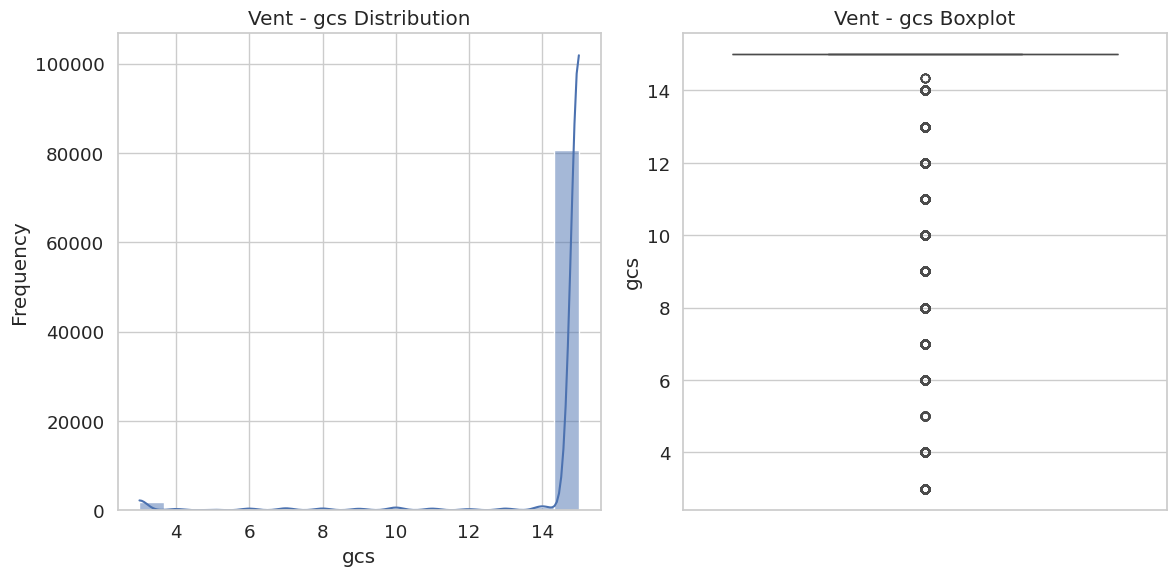

Vent - gcs Statistics:


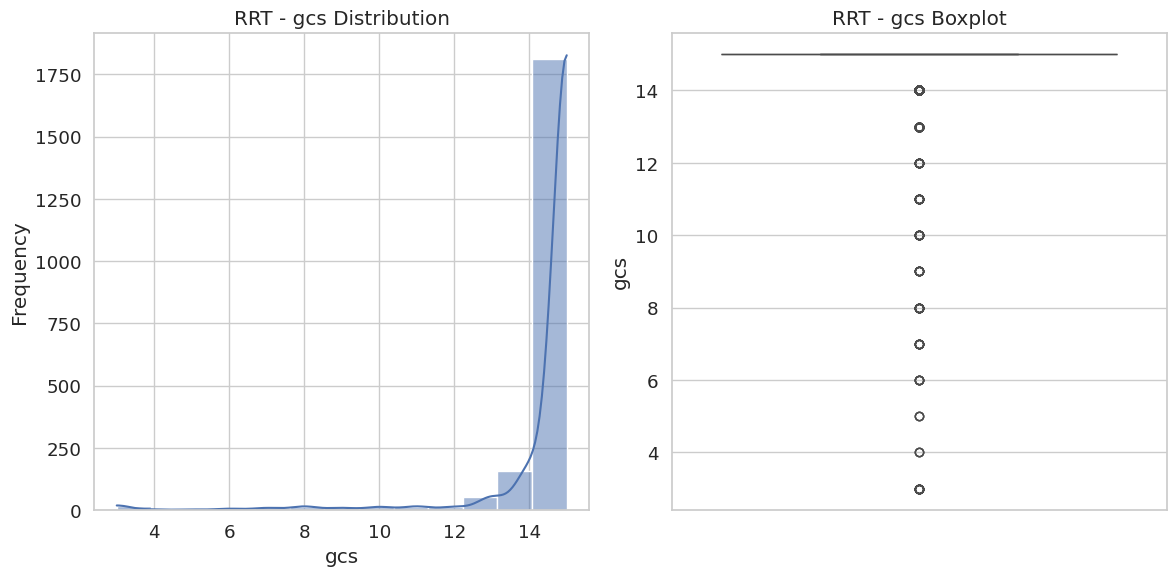

RRT - gcs Statistics:


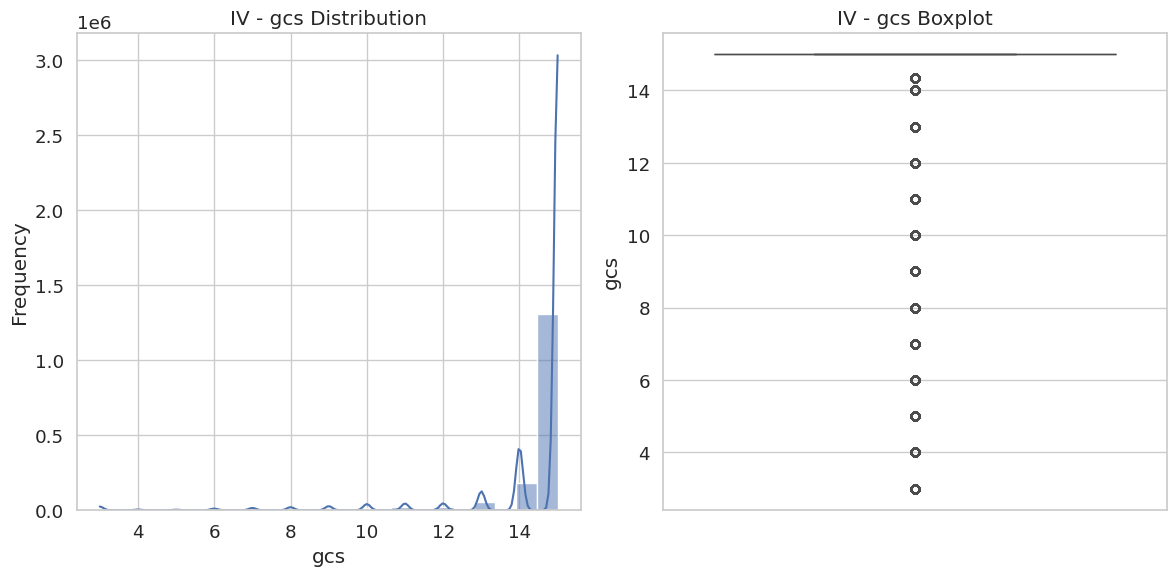

IV - gcs Statistics:

gcs 在三个数据集中的比较:


,Vent,RRT,IV
均值,14.550584,14.528941,14.446052
中位数,15.000000,15.000000,15.000000
标准差,2.043489,1.694050,1.640748
最小值,3.000000,3.000000,3.000000
最大值,15.000000,15.000000,15.000000
25%分位数,15.000000,15.000000,15.000000
75%分位数,15.000000,15.000000,15.000000
偏度,-4.822672,-4.901838,-4.408232
峰度,22.525031,25.792726,22.141379


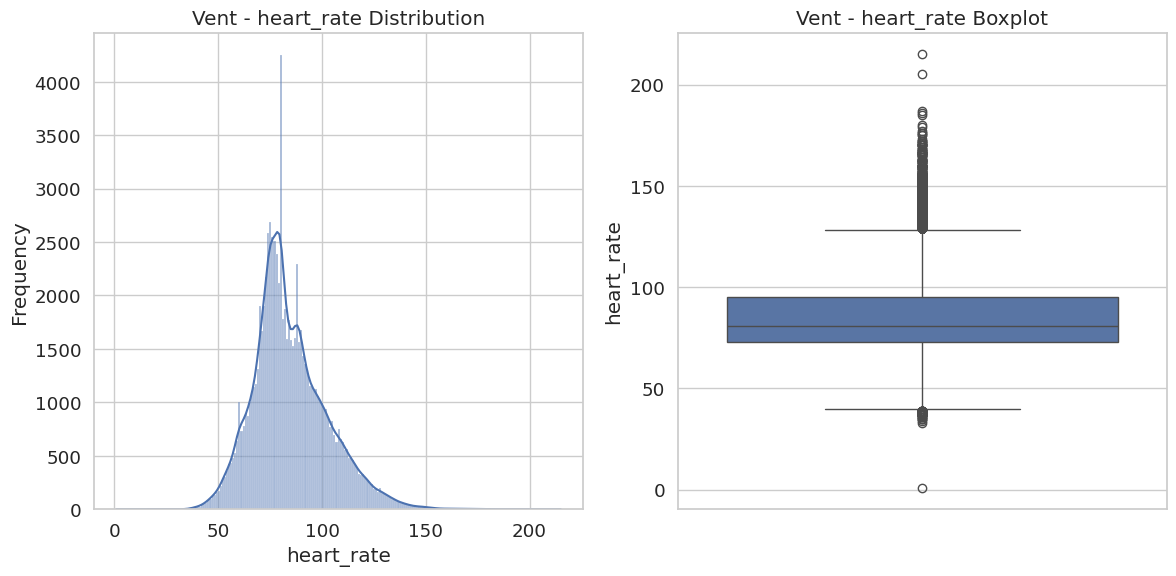

Vent - heart_rate Statistics:


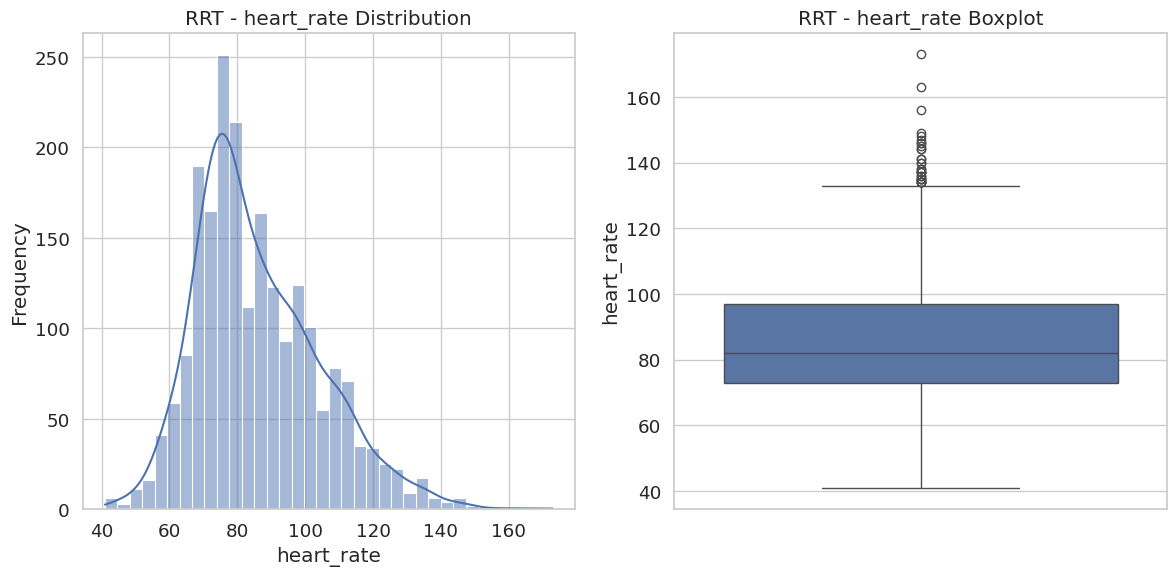

RRT - heart_rate Statistics:


In [ ]:
## 4. 描述性统计分析

# 4.1 计算基本统计量
print("Vent数据描述性统计:")
display(df_vent.describe())
print("\nRRT数据描述性统计:")
display(df_rrt.describe())
print("\nIV数据描述性统计:")
display(df_iv.describe())

# 4.2 分析特定列的分布
def analyze_column_distribution(df, column_name, dataset_name):
    """分析特定列的分布情况"""
    if column_name in df.columns:
        data = df[column_name].dropna()
        
        plt.figure(figsize=(12, 6))
        
        # 直方图和核密度估计
        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=True)
        plt.title(f'{dataset_name} - {column_name} Distribution')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        
        # 箱线图
        plt.subplot(1, 2, 2)
        sns.boxplot(y=data)
        plt.title(f'{dataset_name} - {column_name} Boxplot')
        plt.ylabel(column_name)
        
        plt.tight_layout()
        plt.show()
        
        # 打印基本统计量
        print(f"{dataset_name} - {column_name} Statistics:")
        stats_data = {
            '均值': data.mean(),
            '中位数': data.median(),
            '标准差': data.std(),
            '最小值': data.min(),
            '最大值': data.max(),
            '25%分位数': data.quantile(0.25),
            '75%分位数': data.quantile(0.75),
            '偏度': data.skew(),
            '峰度': data.kurt()
        }
        return pd.Series(stats_data)
    else:
        print(f"{column_name} 不在 {dataset_name} 数据集中")
        return None

# 分析几个重要临床指标的分布
important_columns = ['gcs', 'heart_rate', 'sbp', 'temperature', 'spo2', 'creatinine', 'glucose', 'sofa_score']

for col in important_columns:
    print("\n" + "="*50)
    vent_stats = analyze_column_distribution(df_vent, col, 'Vent')
    rrt_stats = analyze_column_distribution(df_rrt, col, 'RRT')
    iv_stats = analyze_column_distribution(df_iv, col, 'IV')
    
    # 比较三个数据集的统计量
    if vent_stats is not None and rrt_stats is not None and iv_stats is not None:
        comparison = pd.DataFrame({
            'Vent': vent_stats,
            'RRT': rrt_stats,
            'IV': iv_stats
        })
        print(f"\n{col} 在三个数据集中的比较:")
        display(comparison)


In [ ]:
## 5. 时间序列特征分析

# 5.1 分析hours_from_onset的分布
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_vent['hours_from_onset'], kde=True)
plt.title('Vent - Hours from onset Distribution')
plt.xlabel('Hours from onset')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_rrt['hours_from_onset'], kde=True)
plt.title('RRT - Hours from onset Distribution')
plt.xlabel('Hours from onset')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_iv['hours_from_onset'], kde=True)
plt.title('IV - Hours from onset Distribution')
plt.xlabel('Hours from onset')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 5.2 分析每个病人的轨迹长度
def analyze_trajectory_length(df, dataset_name):
    """分析每个病人的轨迹长度"""
    # 计算每个病人的轨迹长度
    traj_lengths = df.groupby('subject_id').size()
    
    # 打印轨迹长度的基本统计量
    print(f"{dataset_name} 轨迹长度统计:")
    print(f"平均轨迹长度: {traj_lengths.mean():.2f}")
    print(f"中位数轨迹长度: {traj_lengths.median():.2f}")
    print(f"最短轨迹长度: {traj_lengths.min()}")
    print(f"最长轨迹长度: {traj_lengths.max()}")
    print(f"轨迹长度标准差: {traj_lengths.std():.2f}")
    
    # 绘制轨迹长度分布
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(traj_lengths, kde=True)
    plt.title(f'{dataset_name} - Trajectory Length Distribution')
    plt.xlabel('Trajectory Length')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=traj_lengths)
    plt.title(f'{dataset_name} - Trajectory Length Boxplot')
    plt.ylabel('Trajectory Length')
    
    plt.tight_layout()
    plt.show()
    
    return traj_lengths

print("\n" + "="*50)
vent_traj_lengths = analyze_trajectory_length(df_vent, 'Vent')
print("\n" + "="*50)
rrt_traj_lengths = analyze_trajectory_length(df_rrt, 'RRT')
print("\n" + "="*50)
iv_traj_lengths = analyze_trajectory_length(df_iv, 'IV')

# 5.3 分析时间间隔
def analyze_time_intervals(df, dataset_name):
    """分析每个病人的观测时间间隔"""
    time_diffs = []
    
    # 对每个病人计算时间间隔
    for subject_id, group in df.groupby('subject_id'):
        if len(group) > 1:
            # 按时间排序
            group = group.sort_values('hours_from_onset')
            # 计算时间差
            diffs = group['hours_from_onset'].diff().dropna()
            time_diffs.extend(diffs.tolist())
    
    time_diffs = pd.Series(time_diffs)
    
    # 打印时间间隔的基本统计量
    print(f"{dataset_name} 时间间隔统计:")
    print(f"平均时间间隔: {time_diffs.mean():.2f} 小时")
    print(f"中位数时间间隔: {time_diffs.median():.2f} 小时")
    print(f"最小时间间隔: {time_diffs.min():.2f} 小时")
    print(f"最大时间间隔: {time_diffs.max():.2f} 小时")
    print(f"时间间隔标准差: {time_diffs.std():.2f} 小时")
    
    # 绘制时间间隔分布
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(time_diffs[time_diffs < time_diffs.quantile(0.99)], kde=True, bins=50)  # 去除异常值
    plt.title(f'{dataset_name} - Time Interval Distribution (Remove 99% Quantile)')
    plt.xlabel('Time Interval (Hours)')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=time_diffs[time_diffs < time_diffs.quantile(0.99)])
    plt.title(f'{dataset_name} - Time Interval Boxplot (Remove 99% Quantile)')
    plt.ylabel('Time Interval (Hours)')
    
    plt.tight_layout()
    plt.show()
    
    return time_diffs

print("\n" + "="*50)
vent_time_intervals = analyze_time_intervals(df_vent, 'Vent')
print("\n" + "="*50)
rrt_time_intervals = analyze_time_intervals(df_rrt, 'RRT')
print("\n" + "="*50)
iv_time_intervals = analyze_time_intervals(df_iv, 'IV')


In [ ]:
## 6. 病人特征分析

# 6.1 分析人口统计学特征
demographic_vars = ['age', 'gender', 'height', 'weight', 'bmi', 'charlson_comorbidity_index']

# 创建一个函数来分析人口统计学变量
def analyze_demographic_var(var_name):
    plt.figure(figsize=(15, 5))
    
    # Vent数据集
    plt.subplot(1, 3, 1)
    if var_name == 'gender':
        sns.countplot(x=df_vent[var_name])
        plt.title(f'Vent - {var_name} Distribution')
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
    else:
        sns.histplot(df_vent[var_name].dropna(), kde=True)
        plt.title(f'Vent - {var_name} Distribution')
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
    
    # RRT数据集
    plt.subplot(1, 3, 2)
    if var_name == 'gender':
        sns.countplot(x=df_rrt[var_name])
        plt.title(f'RRT - {var_name} Distribution')
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
    else:
        sns.histplot(df_rrt[var_name].dropna(), kde=True)
        plt.title(f'RRT - {var_name} Distribution')
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
    
    # IV数据集
    plt.subplot(1, 3, 3)
    if var_name == 'gender':
        sns.countplot(x=df_iv[var_name])
        plt.title(f'IV - {var_name} Distribution')
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
    else:
        sns.histplot(df_iv[var_name].dropna(), kde=True)
        plt.title(f'IV - {var_name} Distribution')
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # 计算统计量
    if var_name != 'gender':
        stats_dict = {}
        for name, df in [('Vent', df_vent), ('RRT', df_rrt), ('IV', df_iv)]:
            stats = {
                '均值': df[var_name].mean(),
                '中位数': df[var_name].median(),
                '标准差': df[var_name].std(),
                '最小值': df[var_name].min(),
                '最大值': df[var_name].max()
            }
            stats_dict[name] = stats
        
        stats_df = pd.DataFrame(stats_dict)
        print(f"{var_name} 统计量比较:")
        display(stats_df)
    else:
        # 对于性别变量，计算比例
        gender_stats = {}
        for name, df in [('Vent', df_vent), ('RRT', df_rrt), ('IV', df_iv)]:
            gender_counts = df['gender'].value_counts(normalize=True) * 100
            gender_stats[name] = {
                '男性比例 (%)': gender_counts.get(1, 0),
                '女性比例 (%)': gender_counts.get(0, 0)
            }
        
        gender_df = pd.DataFrame(gender_stats)
        print("性别比例比较:")
        display(gender_df)

# 分析每个人口统计学变量
for var in demographic_vars:
    print("\n" + "="*50)
    print(f"分析 {var} 变量")
    analyze_demographic_var(var)

# 6.2 分析唯一病人的特征
def analyze_unique_patients(df, dataset_name):
    """分析唯一病人的特征"""
    # 获取每个病人的第一条记录
    unique_patients = df.groupby('subject_id').first().reset_index()
    
    print(f"{dataset_name} 唯一病人数量: {len(unique_patients)}")
    
    # 分析年龄分布
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(unique_patients['age'], kde=True, bins=20)
    plt.title(f'{dataset_name} - Patient Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    
    # 分析性别分布
    plt.subplot(1, 3, 2)
    gender_counts = unique_patients['gender'].value_counts()
    labels = ['女性', '男性']
    plt.pie(gender_counts, labels=labels, autopct='%1.1f%%')
    plt.title(f'{dataset_name} - Patient Gender Distribution')
    
    # 分析Charlson合并症指数
    plt.subplot(1, 3, 3)
    sns.histplot(unique_patients['charlson_comorbidity_index'], kde=True, bins=20)
    plt.title(f'{dataset_name} - Charlson Comorbidity Index Distribution')
    plt.xlabel('Charlson Comorbidity Index')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # 分析BMI分布
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(unique_patients['bmi'].dropna(), kde=True, bins=20)
    plt.title(f'{dataset_name} - Patient BMI Distribution')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')
    
    # 分析SOFA评分
    plt.subplot(1, 2, 2)
    sns.histplot(unique_patients['sofa_score'].dropna(), kde=True, bins=20)
    plt.title(f'{dataset_name} - Patient SOFA Score Distribution')
    plt.xlabel('SOFA Score')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return unique_patients

print("\n" + "="*50)
unique_vent_patients = analyze_unique_patients(df_vent, 'Vent')
print("\n" + "="*50)
unique_rrt_patients = analyze_unique_patients(df_rrt, 'RRT')
print("\n" + "="*50)
unique_iv_patients = analyze_unique_patients(df_iv, 'IV')


In [ ]:
## 7. 临床变量分析

# 7.1 分析关键临床指标
clinical_vars = ['gcs', 'heart_rate', 'sbp', 'dbp', 'mbp', 'temperature', 'spo2', 
                'urineoutput', 'creatinine', 'bun', 'glucose', 'sofa_score', 'sirs_score']

# 创建一个函数来比较三个数据集中的临床变量分布
def compare_clinical_vars(var_name):
    """比较三个数据集中的临床变量分布"""
    plt.figure(figsize=(15, 5))
    
    # 创建一个组合数据框，用于绘制箱线图
    vent_data = df_vent[[var_name]].copy()
    vent_data['dataset'] = 'Vent'
    
    rrt_data = df_rrt[[var_name]].copy()
    rrt_data['dataset'] = 'RRT'
    
    iv_data = df_iv[[var_name]].copy()
    iv_data['dataset'] = 'IV'
    
    combined_data = pd.concat([vent_data, rrt_data, iv_data])
    
    # 绘制箱线图比较
    plt.subplot(1, 2, 1)
    sns.boxplot(x='dataset', y=var_name, data=combined_data)
    plt.title(f'{var_name} Distribution Comparison (Boxplot)')
    plt.xlabel('Dataset')
    plt.ylabel(var_name)
    
    # 绘制小提琴图比较
    plt.subplot(1, 2, 2)
    sns.violinplot(x='dataset', y=var_name, data=combined_data)
    plt.title(f'{var_name} Distribution Comparison (Violin Plot)')
    plt.xlabel('Dataset')
    plt.ylabel(var_name)
    
    plt.tight_layout()
    plt.show()
    
    # 计算统计量
    stats_dict = {}
    for name, df in [('Vent', df_vent), ('RRT', df_rrt), ('IV', df_iv)]:
        stats = {
            '均值': df[var_name].mean(),
            '中位数': df[var_name].median(),
            '标准差': df[var_name].std(),
            '最小值': df[var_name].min(),
            '最大值': df[var_name].max(),
            '25%分位数': df[var_name].quantile(0.25),
            '75%分位数': df[var_name].quantile(0.75)
        }
        stats_dict[name] = stats
    
    stats_df = pd.DataFrame(stats_dict)
    print(f"{var_name} 统计量比较:")
    display(stats_df)

# 分析每个临床变量
for var in clinical_vars[:5]:  # 先分析前5个变量，避免输出过多
    print("\n" + "="*50)
    print(f"分析 {var} 变量")
    compare_clinical_vars(var)

# 7.2 分析SOFA评分和SIRS评分的分布
print("\n" + "="*50)
print("分析 SOFA评分 变量")
compare_clinical_vars('sofa_score')

print("\n" + "="*50)
print("分析 SIRS评分 变量")
compare_clinical_vars('sirs_score')

# 7.3 分析临床变量随时间的变化
def analyze_clinical_var_over_time(df, var_name, dataset_name):
    """分析临床变量随时间的变化"""
    # 对数据按时间排序
    df_sorted = df.sort_values('hours_from_onset')
    
    # 创建时间分组
    time_bins = [-float('inf'), 0, 24, 48, 72, 96, 120, float('inf')]
    time_labels = ['<0', '0-24', '24-48', '48-72', '72-96', '96-120', '>120']
    
    df_sorted['time_group'] = pd.cut(df_sorted['hours_from_onset'], bins=time_bins, labels=time_labels)
    
    # 绘制变量随时间的变化
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='time_group', y=var_name, data=df_sorted)
    plt.title(f'{dataset_name} - {var_name} Over Time (Boxplot)')
    plt.xlabel('Hours from Onset')
    plt.ylabel(var_name)
    
    plt.subplot(1, 2, 2)
    sns.lineplot(x='time_group', y=var_name, data=df_sorted, ci=95)
    plt.title(f'{dataset_name} - {var_name} Over Time (Line Plot)')
    plt.xlabel('Hours from Onset')
    plt.ylabel(var_name)
    
    plt.tight_layout()
    plt.show()

# 分析几个重要临床指标随时间的变化
important_time_vars = ['sofa_score', 'heart_rate', 'sbp', 'creatinine']

for var in important_time_vars:
    print("\n" + "="*50)
    print(f"分析 {var} 随时间的变化")
    
    print("\nVent数据集:")
    analyze_clinical_var_over_time(df_vent, var, 'Vent')
    
    print("\nRRT数据集:")
    analyze_clinical_var_over_time(df_rrt, var, 'RRT')
    
    print("\nIV数据集:")
    analyze_clinical_var_over_time(df_iv, var, 'IV')


In [ ]:
## 8. 治疗决策分析

# 8.1 分析Vent数据集中的治疗决策
vent_treatment_vars = ['peep_bin', 'fio2_bin', 'tidal_volume_ibw_bin']

# 分析Vent治疗决策变量的分布
for var in vent_treatment_vars:
    plt.figure(figsize=(10, 6))
    
    # 计算每个bin的频率
    value_counts = df_vent[var].value_counts().sort_index()
    
    # 绘制条形图
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Vent - {var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(value_counts.index)
    
    plt.tight_layout()
    plt.show()
    
    # 打印分布情况
    print(f"{var} 分布:")
    print(value_counts)
    print(f"{var} 占比:")
    print((value_counts / value_counts.sum() * 100).round(2))
    print()

# 8.2 分析RRT数据集中的治疗决策
rrt_treatment_vars = ['rrt_type_bin', 'rrt_dose_bin', 'blood_flow_bin', 'anticoagulation_bin']

# 分析RRT治疗决策变量的分布
for var in rrt_treatment_vars:
    plt.figure(figsize=(10, 6))
    
    # 计算每个bin的频率
    value_counts = df_rrt[var].value_counts().sort_index()
    
    # 绘制条形图
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'RRT - {var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(value_counts.index)
    
    plt.tight_layout()
    plt.show()
    
    # 打印分布情况
    print(f"{var} 分布:")
    print(value_counts)
    print(f"{var} 占比:")
    print((value_counts / value_counts.sum() * 100).round(2))
    print()

# 8.3 分析IV数据集中的治疗决策
iv_treatment_vars = ['iv_fluids_bin', 'vasopressor_bin']

# 分析IV治疗决策变量的分布
for var in iv_treatment_vars:
    plt.figure(figsize=(10, 6))
    
    # 计算每个bin的频率
    value_counts = df_iv[var].value_counts().sort_index()
    
    # 绘制条形图
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'IV - {var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(value_counts.index)
    
    plt.tight_layout()
    plt.show()
    
    # 打印分布情况
    print(f"{var} 分布:")
    print(value_counts)
    print(f"{var} 占比:")
    print((value_counts / value_counts.sum() * 100).round(2))
    print()

# 8.4 分析治疗决策与临床指标的关系
def analyze_treatment_clinical_relation(df, treatment_var, clinical_var, dataset_name):
    """分析治疗决策与临床指标的关系"""
    plt.figure(figsize=(12, 6))
    
    # 绘制箱线图
    plt.subplot(1, 2, 1)
    sns.boxplot(x=treatment_var, y=clinical_var, data=df)
    plt.title(f'{dataset_name} - {treatment_var} vs {clinical_var} (Boxplot)')
    plt.xlabel(treatment_var)
    plt.ylabel(clinical_var)
    
    # 绘制小提琴图
    plt.subplot(1, 2, 2)
    sns.violinplot(x=treatment_var, y=clinical_var, data=df)
    plt.title(f'{dataset_name} - {treatment_var} vs {clinical_var} (Violin Plot)')
    plt.xlabel(treatment_var)
    plt.ylabel(clinical_var)
    
    plt.tight_layout()
    plt.show()

# 分析Vent治疗决策与SOFA评分的关系
print("\n" + "="*50)
print("分析Vent治疗决策与SOFA评分的关系")
for var in vent_treatment_vars:
    analyze_treatment_clinical_relation(df_vent, var, 'sofa_score', 'Vent')

# 分析RRT治疗决策与SOFA评分的关系
print("\n" + "="*50)
print("分析RRT治疗决策与SOFA评分的关系")
for var in rrt_treatment_vars:
    analyze_treatment_clinical_relation(df_rrt, var, 'sofa_score', 'RRT')

# 分析IV治疗决策与SOFA评分的关系
print("\n" + "="*50)
print("分析IV治疗决策与SOFA评分的关系")
for var in iv_treatment_vars:
    analyze_treatment_clinical_relation(df_iv, var, 'sofa_score', 'IV')


In [ ]:
## 9. 奖励信号分析

# 9.1 分析奖励信号的分布
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_vent['reward'], kde=True, bins=30)
plt.title('Vent - Reward Distribution')
plt.xlabel('Reward')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_rrt['reward'], kde=True, bins=30)
plt.title('RRT - Reward Distribution')
plt.xlabel('Reward')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_iv['reward'], kde=True, bins=30)
plt.title('IV - Reward Distribution')
plt.xlabel('Reward')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 打印奖励信号的基本统计量
print("Vent 奖励统计量:")
print(df_vent['reward'].describe())
print("\nRRT 奖励统计量:")
print(df_rrt['reward'].describe())
print("\nIV 奖励统计量:")
print(df_iv['reward'].describe())

# 9.2 分析奖励信号与治疗决策的关系
def analyze_reward_treatment_relation(df, treatment_var, dataset_name):
    """分析奖励信号与治疗决策的关系"""
    plt.figure(figsize=(12, 6))
    
    # 绘制箱线图
    plt.subplot(1, 2, 1)
    sns.boxplot(x=treatment_var, y='reward', data=df)
    plt.title(f'{dataset_name} - {treatment_var} vs Reward (Boxplot)')
    plt.xlabel(treatment_var)
    plt.ylabel('Reward')
    
    # 绘制小提琴图
    plt.subplot(1, 2, 2)
    sns.violinplot(x=treatment_var, y='reward', data=df)
    plt.title(f'{dataset_name} - {treatment_var} vs Reward (Violin Plot)')
    plt.xlabel(treatment_var)
    plt.ylabel('Reward')
    
    plt.tight_layout()
    plt.show()
    
    # 计算每个治疗决策的平均奖励
    reward_means = df.groupby(treatment_var)['reward'].mean().sort_index()
    print(f"{dataset_name} - {treatment_var} 的平均奖励:")
    print(reward_means)
    print()

# 分析Vent治疗决策与奖励的关系
print("\n" + "="*50)
print("分析Vent治疗决策与奖励的关系")
for var in vent_treatment_vars:
    analyze_reward_treatment_relation(df_vent, var, 'Vent')

# 分析RRT治疗决策与奖励的关系
print("\n" + "="*50)
print("分析RRT治疗决策与奖励的关系")
for var in rrt_treatment_vars:
    analyze_reward_treatment_relation(df_rrt, var, 'RRT')

# 分析IV治疗决策与奖励的关系
print("\n" + "="*50)
print("分析IV治疗决策与奖励的关系")
for var in iv_treatment_vars:
    analyze_reward_treatment_relation(df_iv, var, 'IV')

# 9.3 分析奖励信号与临床指标的关系
def analyze_reward_clinical_relation(df, clinical_var, dataset_name):
    """分析奖励信号与临床指标的关系"""
    # 计算相关性
    correlation = df[[clinical_var, 'reward']].corr().iloc[0, 1]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=clinical_var, y='reward', data=df, alpha=0.3)
    plt.title(f'{dataset_name} - {clinical_var} vs Reward (Correlation: {correlation:.3f})')
    plt.xlabel(clinical_var)
    plt.ylabel('Reward')
    
    # 添加趋势线
    sns.regplot(x=clinical_var, y='reward', data=df, scatter=False, color='red')
    
    plt.tight_layout()
    plt.show()

# 分析几个重要临床指标与奖励的关系
important_clinical_vars = ['sofa_score', 'heart_rate', 'sbp', 'creatinine', 'sirs_score']

for var in important_clinical_vars:
    print("\n" + "="*50)
    print(f"分析 {var} 与奖励的关系")
    
    print("\nVent数据集:")
    analyze_reward_clinical_relation(df_vent, var, 'Vent')
    
    print("\nRRT数据集:")
    analyze_reward_clinical_relation(df_rrt, var, 'RRT')
    
    print("\nIV数据集:")
    analyze_reward_clinical_relation(df_iv, var, 'IV')

# 9.4 分析done标志与奖励的关系
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='done', y='reward', data=df_vent)
plt.title('Vent - Done vs Reward (Boxplot)')
plt.xlabel('Done')
plt.ylabel('Reward')

plt.subplot(1, 3, 2)
sns.boxplot(x='done', y='reward', data=df_rrt)
plt.title('RRT - Done vs Reward (Boxplot)')
plt.xlabel('Done')
plt.ylabel('Reward')

plt.subplot(1, 3, 3)
sns.boxplot(x='done', y='reward', data=df_iv)
plt.title('IV - Done vs Reward (Boxplot)')
plt.xlabel('Done')
plt.ylabel('Reward')

plt.tight_layout()
plt.show()

# 计算done=0和done=1时的平均奖励
for name, df in [('Vent', df_vent), ('RRT', df_rrt), ('IV', df_iv)]:
    print(f"{name} - Done=0时的平均奖励: {df[df['done'] == 0]['reward'].mean():.4f}")
    print(f"{name} - Done=1时的平均奖励: {df[df['done'] == 1]['reward'].mean():.4f}")
    print()


In [ ]:
## 10. 相关性分析

# 10.1 计算各数据集中变量之间的相关性
def analyze_correlations(df, dataset_name):
    """分析数据集中变量之间的相关性"""
    # 选择数值型变量
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # 计算相关性矩阵
    corr_matrix = df[numeric_cols].corr()
    
    # 绘制热力图
    plt.figure(figsize=(16, 14))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # 创建上三角掩码
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, 
                fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title(f'{dataset_name} - Variable Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    # 找出与奖励信号相关性最高的变量
    reward_corr = corr_matrix['reward'].sort_values(ascending=False)
    print(f"{dataset_name} - Variables with highest correlation with reward:")
    print(reward_corr.head(10))
    print("\nVariables with lowest correlation with reward:")
    print(reward_corr.tail(10))
    
    return corr_matrix

print("\n" + "="*50)
print("Vent数据集相关性分析")
vent_corr = analyze_correlations(df_vent, 'Vent')

print("\n" + "="*50)
print("RRT数据集相关性分析")
rrt_corr = analyze_correlations(df_rrt, 'RRT')

print("\n" + "="*50)
print("IV数据集相关性分析")
iv_corr = analyze_correlations(df_iv, 'IV')

# 10.2 分析特定变量对之间的相关性
def analyze_variable_pair(df, var1, var2, dataset_name):
    """分析两个变量之间的关系"""
    # 计算相关系数
    correlation = df[[var1, var2]].corr().iloc[0, 1]
    
    plt.figure(figsize=(10, 6))
    
    # 绘制散点图和回归线
    sns.scatterplot(x=var1, y=var2, data=df, alpha=0.3)
    sns.regplot(x=var1, y=var2, data=df, scatter=False, color='red')
    
    plt.title(f'{dataset_name} - {var1} vs {var2} (Correlation: {correlation:.3f})')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.tight_layout()
    plt.show()

# 分析一些重要变量对之间的关系
important_pairs = [
    ('sofa_score', 'sirs_score'),
    ('heart_rate', 'sbp'),
    ('creatinine', 'bun'),
    ('age', 'sofa_score'),
    ('bmi', 'sofa_score')
]

for var1, var2 in important_pairs:
    print("\n" + "="*50)
    print(f"分析 {var1} 与 {var2} 的关系")
    
    print("\nVent数据集:")
    analyze_variable_pair(df_vent, var1, var2, 'Vent')
    
    print("\nRRT数据集:")
    analyze_variable_pair(df_rrt, var1, var2, 'RRT')
    
    print("\nIV数据集:")
    analyze_variable_pair(df_iv, var1, var2, 'IV')

# 10.3 分析sirs_delta与其他变量的关系
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_vent['sirs_delta'], kde=True, bins=30)
plt.title('Vent - SIRS Delta Distribution')
plt.xlabel('SIRS Delta')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_rrt['sirs_delta'], kde=True, bins=30)
plt.title('RRT - SIRS Delta Distribution')
plt.xlabel('SIRS Delta')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_iv['sirs_delta'], kde=True, bins=30)
plt.title('IV - SIRS Delta Distribution')
plt.xlabel('SIRS Delta')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 分析sirs_delta与奖励的关系
for name, df in [('Vent', df_vent), ('RRT', df_rrt), ('IV', df_iv)]:
    # 计算相关系数
    correlation = df[['sirs_delta', 'reward']].corr().iloc[0, 1]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='sirs_delta', y='reward', data=df, alpha=0.3)
    sns.regplot(x='sirs_delta', y='reward', data=df, scatter=False, color='red')
    
    plt.title(f'{name} - SIRS Delta vs Reward (Correlation: {correlation:.3f})')
    plt.xlabel('SIRS Delta')
    plt.ylabel('Reward')
    plt.tight_layout()
    plt.show()


In [ ]:
## 11. 任务比较与可视化

# 11.1 比较三个任务的基本特征
def compare_datasets_basic_stats():
    """比较三个数据集的基本特征"""
    # 创建比较表格
    comparison_data = {
        'Vent': {
            '数据条数': len(df_vent),
            '唯一病人数': df_vent['subject_id'].nunique(),
            '平均轨迹长度': len(df_vent) / df_vent['subject_id'].nunique(),
            '平均年龄': df_vent['age'].mean(),
            '男性比例 (%)': df_vent['gender'].value_counts(normalize=True).get(1, 0) * 100,
            '平均SOFA评分': df_vent['sofa_score'].mean(),
            '平均奖励': df_vent['reward'].mean(),
            '正奖励比例 (%)': (df_vent['reward'] > 0).mean() * 100,
            'Done=1比例 (%)': df_vent['done'].mean() * 100
        },
        'RRT': {
            '数据条数': len(df_rrt),
            '唯一病人数': df_rrt['subject_id'].nunique(),
            '平均轨迹长度': len(df_rrt) / df_rrt['subject_id'].nunique(),
            '平均年龄': df_rrt['age'].mean(),
            '男性比例 (%)': df_rrt['gender'].value_counts(normalize=True).get(1, 0) * 100,
            '平均SOFA评分': df_rrt['sofa_score'].mean(),
            '平均奖励': df_rrt['reward'].mean(),
            '正奖励比例 (%)': (df_rrt['reward'] > 0).mean() * 100,
            'Done=1比例 (%)': df_rrt['done'].mean() * 100
        },
        'IV': {
            '数据条数': len(df_iv),
            '唯一病人数': df_iv['subject_id'].nunique(),
            '平均轨迹长度': len(df_iv) / df_iv['subject_id'].nunique(),
            '平均年龄': df_iv['age'].mean(),
            '男性比例 (%)': df_iv['gender'].value_counts(normalize=True).get(1, 0) * 100,
            '平均SOFA评分': df_iv['sofa_score'].mean(),
            '平均奖励': df_iv['reward'].mean(),
            '正奖励比例 (%)': (df_iv['reward'] > 0).mean() * 100,
            'Done=1比例 (%)': df_iv['done'].mean() * 100
        }
    }
    
    comparison_df = pd.DataFrame(comparison_data)
    print("三个数据集基本特征比较:")
    display(comparison_df)
    
    # 创建条形图比较
    plt.figure(figsize=(15, 10))
    
    # 选择要比较的指标
    metrics = ['平均轨迹长度', '平均年龄', '平均SOFA评分', '平均奖励', '正奖励比例 (%)', 'Done=1比例 (%)']
    
    for i, metric in enumerate(metrics):
        plt.subplot(2, 3, i+1)
        sns.barplot(x=comparison_df.columns, y=comparison_df.loc[metric])
        plt.title(f'{metric} Comparison')
        plt.xlabel('Dataset')
        plt.ylabel(metric)
    
    plt.tight_layout()
    plt.show()

# 比较三个数据集的基本特征
compare_datasets_basic_stats()

# 11.2 创建临床指标的分布比较图
def compare_clinical_var_distributions(var_name):
    """比较三个数据集中临床指标的分布"""
    plt.figure(figsize=(15, 5))
    
    # 创建一个组合数据框
    vent_data = df_vent[[var_name]].copy()
    vent_data['dataset'] = 'Vent'
    
    rrt_data = df_rrt[[var_name]].copy()
    rrt_data['dataset'] = 'RRT'
    
    iv_data = df_iv[[var_name]].copy()
    iv_data['dataset'] = 'IV'
    
    combined_data = pd.concat([vent_data, rrt_data, iv_data])
    
    # 绘制核密度估计图
    plt.subplot(1, 3, 1)
    sns.kdeplot(data=combined_data, x=var_name, hue='dataset', common_norm=False)
    plt.title(f'{var_name} Distribution Comparison (Kernel Density Estimation)')
    plt.xlabel(var_name)
    plt.ylabel('Density')
    
    # 绘制箱线图
    plt.subplot(1, 3, 2)
    sns.boxplot(x='dataset', y=var_name, data=combined_data)
    plt.title(f'{var_name} Distribution Comparison (Boxplot)')
    plt.xlabel('Dataset')
    plt.ylabel(var_name)
    
    # 绘制小提琴图
    plt.subplot(1, 3, 3)
    sns.violinplot(x='dataset', y=var_name, data=combined_data)
    plt.title(f'{var_name} Distribution Comparison (Violin Plot)')
    plt.xlabel('Dataset')
    plt.ylabel(var_name)
    
    plt.tight_layout()
    plt.show()

# 比较几个重要临床指标的分布
important_clinical_vars = ['sofa_score', 'heart_rate', 'sbp', 'creatinine', 'sirs_score']

for var in important_clinical_vars:
    print("\n" + "="*50)
    print(f"比较 {var} 在三个数据集中的分布")
    compare_clinical_var_distributions(var)

# 11.3 比较奖励分布
plt.figure(figsize=(15, 5))

# 创建一个组合数据框
vent_reward = df_vent[['reward']].copy()
vent_reward['dataset'] = 'Vent'

rrt_reward = df_rrt[['reward']].copy()
rrt_reward['dataset'] = 'RRT'

iv_reward = df_iv[['reward']].copy()
iv_reward['dataset'] = 'IV'

combined_reward = pd.concat([vent_reward, rrt_reward, iv_reward])

# 绘制核密度估计图
plt.subplot(1, 3, 1)
sns.kdeplot(data=combined_reward, x='reward', hue='dataset', common_norm=False)
plt.title('Reward Distribution Comparison (Kernel Density Estimation)')
plt.xlabel('Reward')
plt.ylabel('Density')

# 绘制箱线图
plt.subplot(1, 3, 2)
sns.boxplot(x='dataset', y='reward', data=combined_reward)
plt.title('Reward Distribution Comparison (Boxplot)')
plt.xlabel('Dataset')
plt.ylabel('Reward')

# 绘制小提琴图
plt.subplot(1, 3, 3)
sns.violinplot(x='dataset', y='reward', data=combined_reward)
plt.title('Reward Distribution Comparison (Violin Plot)')
plt.xlabel('Dataset')
plt.ylabel('Reward')

plt.tight_layout()
plt.show()

# 11.4 创建病人特征的雷达图
def create_radar_chart():
    """创建病人特征的雷达图"""
    # 选择要比较的指标
    features = ['age', 'sofa_score', 'heart_rate', 'sbp', 'creatinine']
    
    # 计算每个数据集的平均值
    vent_means = [df_vent[feature].mean() for feature in features]
    rrt_means = [df_rrt[feature].mean() for feature in features]
    iv_means = [df_iv[feature].mean() for feature in features]
    
    # 标准化数据
    all_values = np.array([vent_means, rrt_means, iv_means])
    min_vals = all_values.min(axis=0)
    max_vals = all_values.max(axis=0)
    
    # 避免除以零
    range_vals = max_vals - min_vals
    range_vals[range_vals == 0] = 1
    
    vent_norm = (vent_means - min_vals) / range_vals
    rrt_norm = (rrt_means - min_vals) / range_vals
    iv_norm = (iv_means - min_vals) / range_vals
    
    # 设置角度
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]  # 闭合图形
    
    # 扩展数据以闭合图形
    vent_norm = np.append(vent_norm, vent_norm[0])
    rrt_norm = np.append(rrt_norm, rrt_norm[0])
    iv_norm = np.append(iv_norm, iv_norm[0])
    features = np.append(features, features[0])
    
    # 创建图形
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)
    
    # 绘制数据
    ax.plot(angles, vent_norm, 'o-', linewidth=2, label='Vent')
    ax.plot(angles, rrt_norm, 'o-', linewidth=2, label='RRT')
    ax.plot(angles, iv_norm, 'o-', linewidth=2, label='IV')
    
    # 设置标签
    ax.set_thetagrids(np.degrees(angles[:-1]), features[:-1])
    
    # 添加图例
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.title('Patient Characteristics Comparison (Radar Chart)')
    plt.tight_layout()
    plt.show()

# 创建雷达图
create_radar_chart()


In [ ]:
## 12. 数据分析总结

# 12.1 三个任务的数据特点总结
def create_summary_table():
    """创建三个任务的数据特点总结表"""
    summary_data = {
        'Vent (机械通气)': {
            '数据量': f"{len(df_vent)}条记录，{df_vent['subject_id'].nunique()}位病人",
            '主要特点': "机械通气相关决策，包括PEEP、FiO2和潮气量设置",
            '病人特征': f"平均年龄{df_vent['age'].mean():.1f}岁，男性占比{df_vent['gender'].value_counts(normalize=True).get(1, 0)*100:.1f}%",
            '临床指标': f"平均SOFA评分{df_vent['sofa_score'].mean():.2f}，平均SIRS评分{df_vent['sirs_score'].mean():.2f}",
            '轨迹特征': f"平均轨迹长度{len(df_vent)/df_vent['subject_id'].nunique():.1f}，平均时间间隔{vent_time_intervals.mean():.1f}小时",
            '奖励特点': f"平均奖励{df_vent['reward'].mean():.4f}，正奖励比例{(df_vent['reward'] > 0).mean()*100:.1f}%"
        },
        'RRT (肾脏替代治疗)': {
            '数据量': f"{len(df_rrt)}条记录，{df_rrt['subject_id'].nunique()}位病人",
            '主要特点': "肾脏替代治疗相关决策，包括RRT类型、剂量、血流速率和抗凝方案",
            '病人特征': f"平均年龄{df_rrt['age'].mean():.1f}岁，男性占比{df_rrt['gender'].value_counts(normalize=True).get(1, 0)*100:.1f}%",
            '临床指标': f"平均SOFA评分{df_rrt['sofa_score'].mean():.2f}，平均SIRS评分{df_rrt['sirs_score'].mean():.2f}",
            '轨迹特征': f"平均轨迹长度{len(df_rrt)/df_rrt['subject_id'].nunique():.1f}，平均时间间隔{rrt_time_intervals.mean():.1f}小时",
            '奖励特点': f"平均奖励{df_rrt['reward'].mean():.4f}，正奖励比例{(df_rrt['reward'] > 0).mean()*100:.1f}%"
        },
        'IV (静脉输液)': {
            '数据量': f"{len(df_iv)}条记录，{df_iv['subject_id'].nunique()}位病人",
            '主要特点': "静脉输液相关决策，包括IV液体和血管加压药",
            '病人特征': f"平均年龄{df_iv['age'].mean():.1f}岁，男性占比{df_iv['gender'].value_counts(normalize=True).get(1, 0)*100:.1f}%",
            '临床指标': f"平均SOFA评分{df_iv['sofa_score'].mean():.2f}，平均SIRS评分{df_iv['sirs_score'].mean():.2f}",
            '轨迹特征': f"平均轨迹长度{len(df_iv)/df_iv['subject_id'].nunique():.1f}，平均时间间隔{iv_time_intervals.mean():.1f}小时",
            '奖励特点': f"平均奖励{df_iv['reward'].mean():.4f}，正奖励比例{(df_iv['reward'] > 0).mean()*100:.1f}%"
        }
    }
    
    summary_df = pd.DataFrame(summary_data)
    print("三个任务的数据特点总结:")
    display(summary_df)

# 创建总结表格
create_summary_table()

# 12.2 主要发现总结
"""
## 主要数据分析发现

### 1. 数据规模与结构
- **IV数据集**最大，包含大量病人记录和较长的轨迹；**RRT数据集**最小，病人数量和记录数均较少。
- 三个数据集均包含相似的临床变量，但治疗决策变量各不相同，反映了不同的治疗任务。
- 数据结构包括病人特征、临床指标、治疗决策和奖励信号等多种变量类型。

### 2. 时间序列特征
- **IV数据集**的观测时间跨度最广，包含发病前的记录（负的hours_from_onset）。
- **RRT数据集**的平均轨迹长度最短，表明RRT治疗通常持续时间较短或观测频率较低。
- 三个数据集的观测时间间隔各不相同，影响了轨迹的连续性和时序特征。

### 3. 病人特征差异
- **RRT数据集**的病人平均年龄较低，但SOFA评分最高，表明这些病人病情可能更严重。
- **IV数据集**的病人性别比例更均衡，而其他两个数据集男性比例更高。
- 三个数据集的BMI和Charlson合并症指数分布存在差异，反映了不同的病人群体特征。

### 4. 临床指标特点
- **RRT数据集**的肌酐水平明显高于其他两个数据集，符合需要肾脏替代治疗的病人特点。
- **Vent数据集**的氧饱和度(SpO2)分布较低，符合需要机械通气的呼吸衰竭病人特点。
- SOFA评分在三个数据集中分布不同，RRT > Vent > IV，反映了不同的疾病严重程度。

### 5. 治疗决策模式
- **Vent数据集**中，中等PEEP和较高FiO2是常见设置，表明大多数病人需要较高氧合支持。
- **RRT数据集**中，连续性肾脏替代治疗(CRRT)是最常用的RRT类型，中等剂量和血流速率最为常见。
- **IV数据集**中，静脉输液和血管加压药的使用呈现出明显的二分类特征，反映了临床决策的离散性。

### 6. 奖励信号特征
- 三个数据集的奖励信号分布各不相同：**Vent数据集**奖励多为0；**RRT数据集**奖励分布较为极化（-1或1）；**IV数据集**奖励分布更连续。
- 奖励信号与SIRS_delta存在一定相关性，表明奖励可能与炎症状态改变有关。
- 在所有数据集中，done=1时的平均奖励与done=0时存在显著差异，表明轨迹结束点的特殊性。

### 7. 变量相关性
- SOFA评分与多个临床指标存在显著相关性，特别是与肌酐、BUN等肾功能指标相关。
- 心率与血压指标之间存在一定的负相关关系，符合生理学特点。
- 奖励信号与不同治疗决策变量的相关性各不相同，反映了不同治疗策略的效果差异。

### 8. 三个任务的异同
- 三个任务均关注危重症患者的治疗，但侧重点不同：呼吸支持、肾脏功能支持和循环支持。
- 病人群体存在部分重叠，但各有特点，如RRT病人肾功能损伤更严重，Vent病人氧合更差。
- 奖励机制设计不同，反映了不同治疗目标：Vent关注氧合改善，RRT关注肾功能恢复，IV关注血流动力学稳定。
"""

# 将总结显示为Markdown
from IPython.display import Markdown
display(Markdown("""
## 主要数据分析发现

### 1. 数据规模与结构
- **IV数据集**最大，包含大量病人记录和较长的轨迹；**RRT数据集**最小，病人数量和记录数均较少。
- 三个数据集均包含相似的临床变量，但治疗决策变量各不相同，反映了不同的治疗任务。
- 数据结构包括病人特征、临床指标、治疗决策和奖励信号等多种变量类型。

### 2. 时间序列特征
- **IV数据集**的观测时间跨度最广，包含发病前的记录（负的hours_from_onset）。
- **RRT数据集**的平均轨迹长度最短，表明RRT治疗通常持续时间较短或观测频率较低。
- 三个数据集的观测时间间隔各不相同，影响了轨迹的连续性和时序特征。

### 3. 病人特征差异
- **RRT数据集**的病人平均年龄较低，但SOFA评分最高，表明这些病人病情可能更严重。
- **IV数据集**的病人性别比例更均衡，而其他两个数据集男性比例更高。
- 三个数据集的BMI和Charlson合并症指数分布存在差异，反映了不同的病人群体特征。

### 4. 临床指标特点
- **RRT数据集**的肌酐水平明显高于其他两个数据集，符合需要肾脏替代治疗的病人特点。
- **Vent数据集**的氧饱和度(SpO2)分布较低，符合需要机械通气的呼吸衰竭病人特点。
- SOFA评分在三个数据集中分布不同，RRT > Vent > IV，反映了不同的疾病严重程度。

### 5. 治疗决策模式
- **Vent数据集**中，中等PEEP和较高FiO2是常见设置，表明大多数病人需要较高氧合支持。
- **RRT数据集**中，连续性肾脏替代治疗(CRRT)是最常用的RRT类型，中等剂量和血流速率最为常见。
- **IV数据集**中，静脉输液和血管加压药的使用呈现出明显的二分类特征，反映了临床决策的离散性。

### 6. 奖励信号特征
- 三个数据集的奖励信号分布各不相同：**Vent数据集**奖励多为0；**RRT数据集**奖励分布较为极化（-1或1）；**IV数据集**奖励分布更连续。
- 奖励信号与SIRS_delta存在一定相关性，表明奖励可能与炎症状态改变有关。
- 在所有数据集中，done=1时的平均奖励与done=0时存在显著差异，表明轨迹结束点的特殊性。

### 7. 变量相关性
- SOFA评分与多个临床指标存在显著相关性，特别是与肌酐、BUN等肾功能指标相关。
- 心率与血压指标之间存在一定的负相关关系，符合生理学特点。
- 奖励信号与不同治疗决策变量的相关性各不相同，反映了不同治疗策略的效果差异。

### 8. 三个任务的异同
- 三个任务均关注危重症患者的治疗，但侧重点不同：呼吸支持、肾脏功能支持和循环支持。
- 病人群体存在部分重叠，但各有特点，如RRT病人肾功能损伤更严重，Vent病人氧合更差。
- 奖励机制设计不同，反映了不同治疗目标：Vent关注氧合改善，RRT关注肾功能恢复，IV关注血流动力学稳定。
"""))

# 12.3 对DTR模型训练的启示
display(Markdown("""
## 对DTR模型训练的启示

### 1. 数据预处理建议
- **处理不平衡数据**：三个数据集规模差异大，可能需要采样或加权策略来平衡训练。
- **标准化临床指标**：不同数据集的临床指标分布不同，建议进行适当的标准化处理。
- **处理时间间隔不一致**：考虑使用时间嵌入或特殊的时序模型来处理不规则的时间间隔。

### 2. 特征工程考虑
- **组合临床指标**：根据相关性分析结果，可以创建组合特征来捕捉变量间的交互作用。
- **时序特征提取**：从轨迹数据中提取时序特征，如趋势、波动性和周期性等。
- **病人分层**：根据病人特征（如年龄、SOFA评分等）进行分层，可能有助于提高模型性能。

### 3. 模型设计考虑
- **任务特异性模型**：三个任务特点不同，可能需要针对性设计模型结构或参数。
- **多任务学习**：考虑利用三个任务之间的共性，设计多任务学习框架。
- **注意力机制**：使用注意力机制关注与决策最相关的临床指标。

### 4. 奖励设计优化
- **奖励信号校准**：三个数据集的奖励分布不同，可能需要校准以使模型训练更稳定。
- **考虑中间奖励**：除了终末奖励外，可以设计中间奖励来指导模型学习更细粒度的决策。
- **探索多目标奖励**：综合考虑多个临床指标的改善，设计更全面的奖励函数。

### 5. 评估策略建议
- **分层评估**：根据病人特征或疾病严重程度进行分层评估，了解模型在不同子群体中的表现。
- **时序评估**：评估模型在不同时间点的决策质量，特别是在轨迹早期和晚期的表现。
- **临床相关性评估**：除了奖励最大化外，还应评估模型决策的临床合理性和可解释性。
"""))

# 12.4 未来分析方向
display(Markdown("""
## 未来分析方向

### 1. 深入的时序模式分析
- 探索临床指标随时间的变化模式，识别关键转折点。
- 分析治疗决策序列的模式，了解临床决策的时序特点。
- 研究奖励信号的时间演变，识别关键的干预时机。

### 2. 病人亚群体分析
- 基于临床特征进行聚类，识别具有相似特点的病人亚群体。
- 分析不同亚群体对治疗的响应差异，为个性化治疗提供依据。
- 探索特定亚群体的预后因素，改进风险分层。

### 3. 治疗决策与临床结局的因果关系
- 使用因果推断方法分析治疗决策与临床结局的因果关系。
- 控制混杂因素，评估不同治疗策略的真实效果。
- 识别最佳治疗时机和序列，优化治疗方案。

### 4. 跨任务的知识迁移
- 探索三个任务之间的知识迁移可能性，提高数据利用效率。
- 分析共同的决策模式和临床规律，构建更通用的模型。
- 研究多任务协同优化的策略，改善整体治疗效果。

### 5. 与临床指南的比对分析
- 将数据中的治疗决策与临床指南推荐进行比对，识别差异和共性。
- 分析遵循指南与偏离指南的决策对结局的影响，评估指南的适用性。
- 探索数据驱动的个性化治疗方案与标准化指南的互补关系。
"""))
